<h1>Investigating limits with Julia</h1>

<p>To get started, we load the <code>MTH229</code> package so that we can make plots and use some symbolic math:</p>

In [1]:
using MTH229
using Plots
plotly()

<hr />

<h3>Quick background</h3>

<p>Read about this material here: <a href="http://mth229.github.io/limits.html">Investigating limits with Julia</a>.</p>

<p>For the impatient, the expression</p>


$$
\lim_{x \rightarrow c} f(x) = L
$$


<p>says that the limit as $x$ goes to $c$ of $f$ is $L$. </p>

<blockquote>
<p>Intuitively, as $x$ gets "close" to $c$, $f(x)$ should be close to $L$.</p>
</blockquote>

<p>If $f(x)$ is <em>continuous</em> at $x=c$, then $L=f(c)$. This is almost always the case for a randomly chosen $c$ - but almost never the case for a textbook choice of $c$. Invariably with text book examples–-though not always–-we will have <code>f&#40;c&#41; &#61; NaN</code> indicating the function is indeterminate at <code>c</code>. For such cases we need to do more work to identify if any such $L$ exists and when it does, what its value is.</p>

<p>In this project, we investigate limits three ways: graphically, with a table of numbers, and analytically, developing the inituition of  limits along the way.</p>

<h4>Graphical approach</h4>

<p>The graphical approach is to plot the expression <em>near</em> $c$ and look visually what $f(x)$ goes to as $x$ gets close to $c$.</p>

<p>For example, what is this limit?</p>


$$
\lim_{x \rightarrow \pi/2} \frac{1 - \sin(x)}{(\pi/2 - x)^2}?
$$


<p>Here is a graph to investigate the problem. We simply graph near $c$ and look:</p>

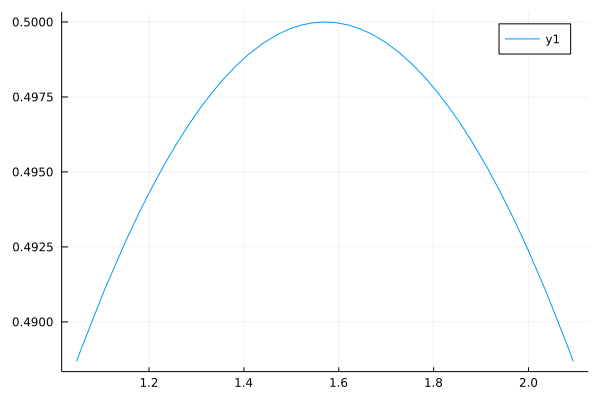

In [1]:
f(x) = (1-sin(x)) / (pi/2 - x)^2
c = pi/2
plot(f, c - pi/6, c + pi/6)

<p>From the graph, we see clearly that as $x$ is close to $c=\pi/2$, $f(x)$ is close to $1/2$. (The fact that <code>f&#40;pi/2&#41; &#61; NaN</code> will either not come up, as <code>pi/2</code> is not among the points sampled or the <code>NaN</code> values will not be plotted.)</p>

<h2>Using tables to investigate limits</h2>

<p>Investigating a limit numerically requires us to operationalize the idea of $x$ getting close to $c$ and $f(x)$ getting close to $L$. Here we do this manually:</p>

In [1]:
f(x) = sin(x)/x
f(0.1), f(0.01), f(0.001), f(0.0001), f(0.00001), f(0.000001)

(0.9983341664682815, 0.9999833334166665, 0.9999998333333416, 0.9999999983333334, 0.9999999999833332, 0.9999999999998334)

<p>From this we see a <em>right</em> limit at 0 appears to be $1$.</p>

<p>We can put the above into a column, by wrapping things in square brackets (forming a vector):</p>

In [1]:
[f(0.1), f(0.01), f(0.001), f(0.0001), f(0.00001), f(0.000001)]

6-element Vector{Float64}:
 0.9983341664682815
 0.9999833334166665
 0.9999998333333416
 0.9999999983333334
 0.9999999999833332
 0.9999999999998334

<p>The style of printing makes it clear, the limit here should be $L=1$.</p>

<p>Limits when $c\neq 0$ are similar, but require points getting close to $c$. For example,</p>


$$
\lim_{x \rightarrow \pi/2} \frac{1 - \sin(x)}{(\pi/2 - x)^2}
$$


<p>has a limit of $1/2$. We can investigate with:</p>

In [1]:
c = pi/2
f(x) = (1 - sin(x))/(pi/2 - x)^2
[f(c+.1), f(c+.001), f(c+.00001), f(c+.0000001), f(c+.000000001)]

5-element Vector{Float64}:
 0.49958347219742816
 0.4999999583256134
 0.5000000413636343
 0.49960036049791995
 0.0

<p>Wait, is the limit $1/2$ or $0$? At first $1/2$ seems like the answer, but the last number is $0$.</p>

<p>Here we see a limitation of tables - when numbers get too small, that fact that they are represented in floating point becomes important. In this case, for numbers too close to $\pi/2$ the value on the computer for <code>sin&#40;x&#41;</code> is just 1 and not a number near 1. Hence the denominator becomes $0$, and so then the expression. (Near $1$, the floating point values are about $10^{-16}$ apart, so when two numbers are within $10^{-16}$ of each other, they can be rounded to the same number.)  So watch out when seeing what the values of $f(x)$ get close to. Here it is clear that the limit is heading towards $0.5$ until we get too close.</p>

<p>For convenience, the <code>lim</code> function from the <code>MTH229</code> package can make the above computations easier to do. Its use follows the common pattern: <code>action&#40;function, arguments...&#41;</code>. For example,</p>

In [1]:
f(x) = (1 - sin(x))/(pi/2 - x)^2
lim(f, pi/2)

6×2 Matrix{Float64}:
 1.6708   0.499583
 1.5808   0.499996
 1.5718   0.5
 1.5709   0.5
 1.57081  0.5
 1.5708   0.500044

<p>The above will generate values just bigger than <code>pi/2</code> which are helpful to investigate the <em>right</em> limit. For a <em>left</em> limit, pass in <code>dir&#61;&quot;-&quot;</code>, as with</p>

In [1]:
lim(f, pi/2, dir="-")

6×2 Matrix{Float64}:
 1.4708   0.499583
 1.5608   0.499996
 1.5698   0.5
 1.5707   0.5
 1.57079  0.5
 1.5708   0.500044

<h2>Symbolic limits</h2>

<p>The add-on package <code>SymPy</code> can be used to analytically compute the limit of a symbolic expressino. The package is loaded when <code>MTH229</code> is. <code>SymPy</code> provides the <code>limit</code> function. A sample usage is shown below:</p>

In [1]:
f(x) = sin(x)/x
@syms x
limit(f(x), x => 0)

<p>The new command, <code>@syms x</code>, creates a symbolic variable named <code>x</code>. This makes <code>f&#40;x&#41;</code> a symbolic expression</p>

In [1]:
f(x)

<p>To find the limit of an expression, <code>ex</code>, as a symbolic variable, <code>x</code>, goes towards some value <code>c</code>, <code>0</code> in the above example, is performed by the command <code>limit&#40;ex, x &#61;&gt; c&#41;</code>. SymPy finds the right limit by default. A left limit can be asked for with the additional argument <code>dir&#61;&quot;-&quot;</code>.</p>

<hr />